<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

# Lab: Logistic Regression

## Learning Objectives
By the end of this lab, you will be able to:
- Understand the difference between linear and logistic regression
- Implement binary logistic regression for classification tasks
- Visualize decision boundaries and model performance
- Evaluate classification models using appropriate metrics
- Use validation sets for feature selection and regularization tuning
- Extend logistic regression to multi-class problems

## Introduction

While linear regression predicts continuous values, **logistic regression** is used for **classification** - predicting discrete categories. Despite its name, logistic regression is a classification algorithm!

The key difference is that logistic regression uses the **sigmoid function** (also called the logistic function) to map predictions to probabilities between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

In [59]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Set random seed for reproducibility
np.random.seed(42) # makes the random numbers predictable

# Set plot style
plt.rcParams['figure.figsize'] = (10, 6)

## Part 1: Understanding the Sigmoid Function

Let's start by visualizing the sigmoid function to understand how it transforms linear predictions into probabilities.

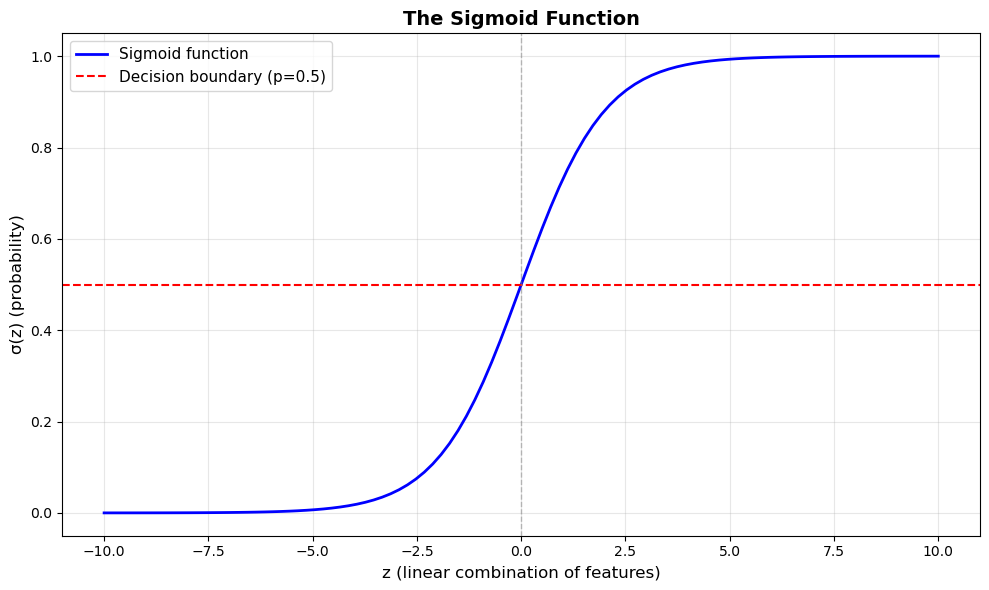

Key observations:
- When z = 0, σ(z) = 0.500
- When z → -∞, σ(z) → 0
- When z → +∞, σ(z) → 1
- The function is always between 0 and 1, making it perfect for probabilities!


In [60]:
def sigmoid(z):
    """Compute the sigmoid function
        - Purpose: Convert any real number into a probability between 0 and 1.
    """
    return 1 / (1 + np.exp(-z)) # with the formula

# Create a range of values
z = np.linspace(-10, 10, 100) # creates a range of possible raw scores so you can see how the sigmoid behaves.

# converts each z value into a probability:
# - Large negative z → probability near 0
# - Large positive z → probability near 1
# This is why the curve is S‑shaped.
y = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z, y, 'b-', linewidth=2, label='Sigmoid function')

# Decision boundary = 0.5 where probability = 0.5, This happens exactly when z = 0.
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=1.5, label='Decision boundary (p=0.5)') # A decision boundary is the rule a model uses to decide which class a data point belongs to.
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=1)
plt.xlabel('z (linear combination of features)', fontsize=12)
plt.ylabel('σ(z) (probability)', fontsize=12)
plt.title('The Sigmoid Function', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("Key observations:")
print(f"- When z = 0, σ(z) = {sigmoid(0):.3f}")
print(f"- When z → -∞, σ(z) → 0")
print(f"- When z → +∞, σ(z) → 1")
print(f"- The function is always between 0 and 1, making it perfect for probabilities!")

## Part 2: Binary Classification Example, Space Shuttle

The goal is to show how logistic regression can help make decisions when outcomes are binary:
* 0 = No O‑ring failure
* 1 = O‑ring failure

From http://www.edwardtufte.com/tufte/ebooks, in "Visual and Statistical Thinking: 
Displays of Evidence for Making Decisions":

This example is famous because it shows how data visualization and statistical thinking could have prevented a tragedy.
>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

But they did not make their case persuasively, and were over-ruled by NASA.

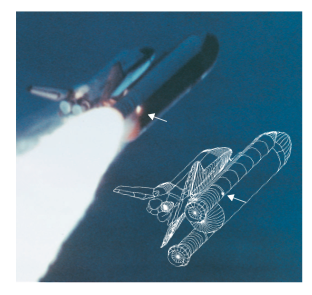

In [61]:
from IPython.display import Image as Im
from IPython.display import display
Im('shuttle.png')

The image above shows the leak, where the O-ring failed.

We have here data on previous failures of the O-rings at various temperatures (loading the file chall.txt)


In [62]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("chall.txt")])
data # The temperature at launch & Whether the O‑rings failed or not

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

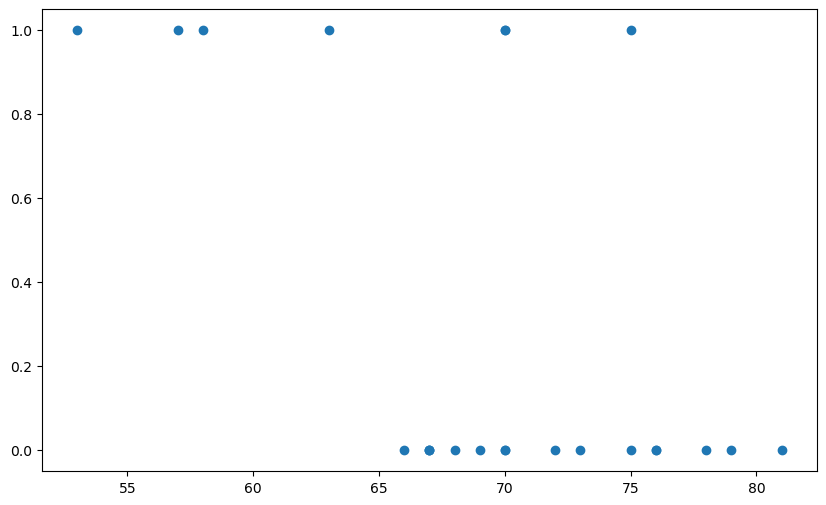

In [63]:
dat = pd.DataFrame(data, columns = ['Temp', 'Failure'])
plt.scatter(dat["Temp"],dat["Failure"])

### Let's see if we can come up with a model for this

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression()

In [66]:
X = dat["Temp"].values
y = dat["Failure"].values
y

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [67]:
model.fit(X.reshape(-1,1),y) # scikit‑learn expects X to be 2‑dimensional, even if you only have one feature.

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


model.score will give us the accuracy, this will be on the training data, no validation

In [68]:
model.score(X.reshape(-1,1),y) # This evaluates the model’s accuracy on the training data.
# Basically means: How well does the trained model predict the correct labels on this dataset?
# Accuracy = number of correct predictions / total predictions
# So if the model got 17 out of 20 points correct: 0.85

0.8695652173913043

### Now let's plot the graph of predictions

linspace gives us all the x's we need, we make the y predictions based on this and the plot should show the picture

#### First diagram: loading the Challenger O‑ring data

(-0.1, 1.1)

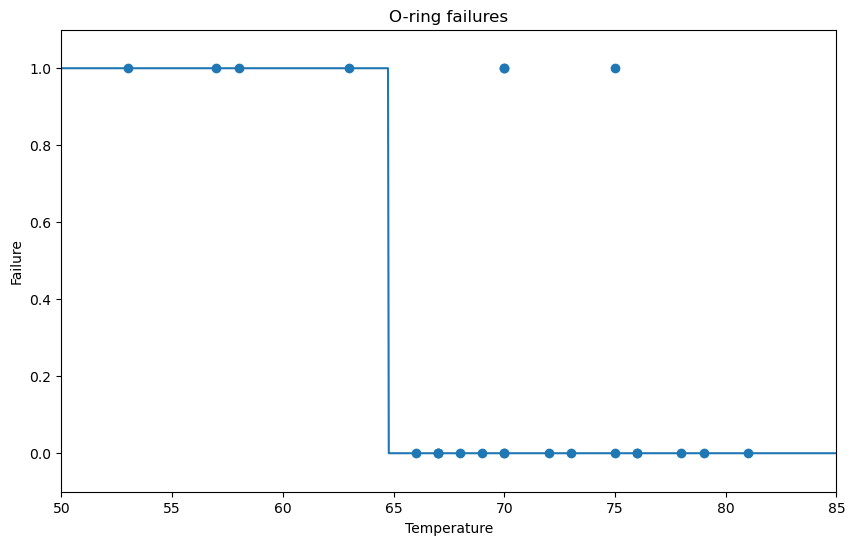

In [69]:
x = np.linspace(50, 85, 1000)
y_pred = model.predict(x.reshape(-1,1))
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_pred)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

#Something very wrong in this picture! - the plot looks like a flat step function, not a smooth S‑curve.

That's not what logistic regression should look!

model.predict only predicts 1 or 0, it does not give in between "probabilities" like we need

#### Second diagram: the WRONG logistic regression plot


(-0.1, 1.1)

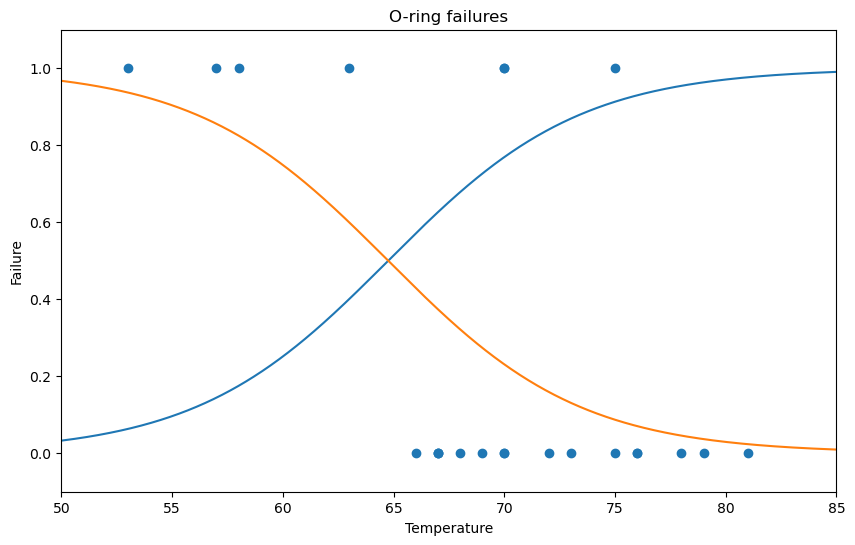

In [70]:
x = np.linspace(50, 85, 1000)
y_predprob = model.predict_proba(x.reshape(-1,1))
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

#Something very wrong in this picture!

It gives two plots. That is because if you look at y_predprob you have two things

In [71]:
y_predprob[0]

array([0.03270804, 0.96729196])

The first one is the probability for 0 while the second one is the probability for 1. Now only plot one

#### Third Diagram: the CORRECT logistic regression probability curve

(-0.1, 1.1)

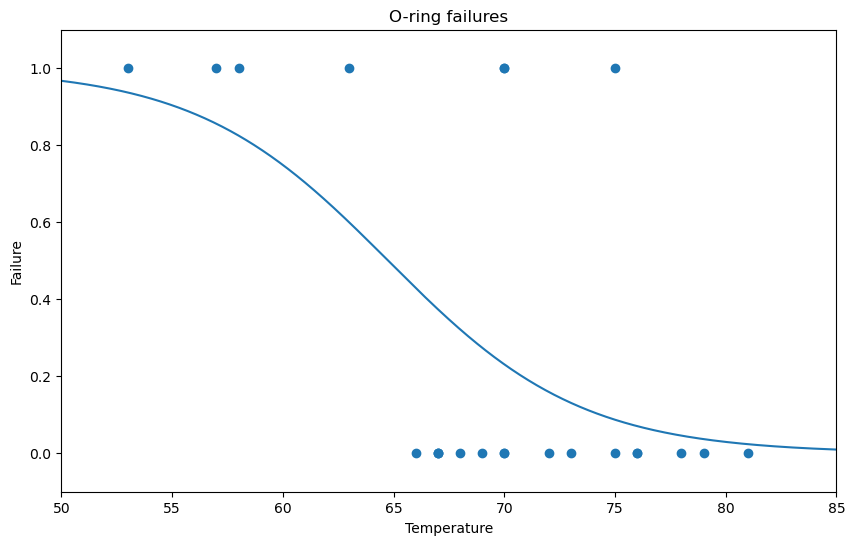

In [72]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob[:,1])

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

## Part 3: Binary Classification - Heart Disease Prediction

### 3.1 Load and Explore the Data

We'll work with a heart disease dataset that contains information about patients and whether they have heart disease.

In [73]:
# Load the dataset
df = pd.read_csv('heart_disease.csv')
# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())
print("\nClass distribution:")
print(df['heart_disease'].value_counts())

Dataset shape: (500, 7)

First few rows:
   age  cholesterol  blood_pressure  max_heart_rate  exercise_hours   bmi  \
0   68          325             159             115             7.4  28.5   
1   58          234             159             170             8.7  37.7   
2   44          188              93             116             4.3  25.1   
3   72          249             164             122             0.4  20.8   
4   37          182             151             125             1.6  28.4   

   heart_disease  
0              1  
1              0  
2              0  
3              0  
4              0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             500 non-null    int64  
 1   cholesterol     500 non-null    int64  
 2   blood_pressure  500 non-null    int64  
 3   max_heart_rate  500 non-null    i

**YOUR CODE HERE**: Create a visualization to explore the relationship between features and the target variable. 

Hint: Create a 2x3 subplot showing how each feature relates to heart disease. You could use histograms, box plots, or scatter plots.

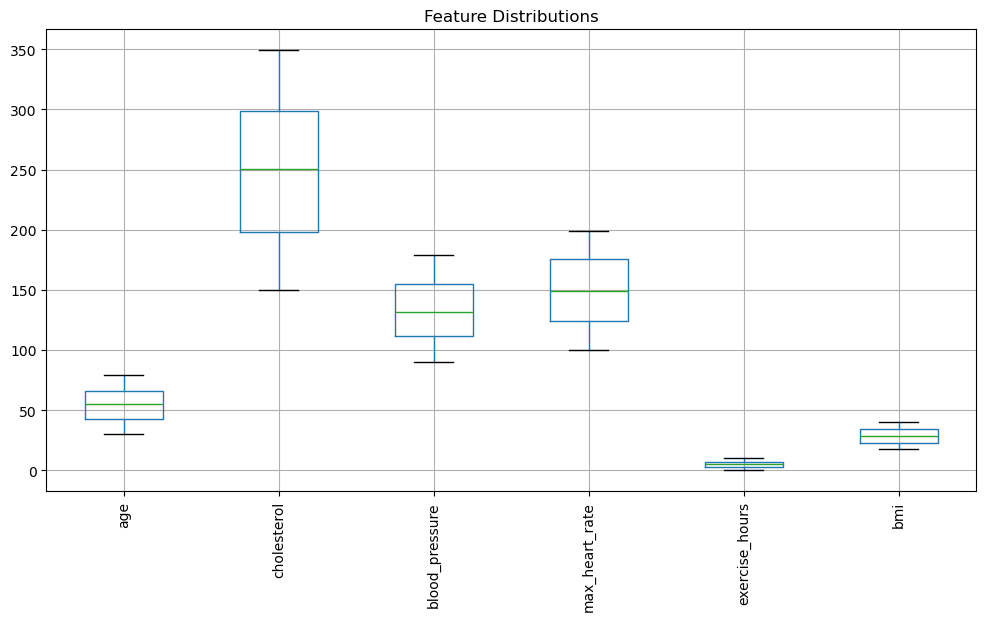

In [74]:
# YOUR CODE HERE
# Create visualizations to explore feature relationships with heart disease
# Example: Create subplots for each feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))


# Create a DataFrame of only the features 
data = df.drop('heart_disease', axis=1) 
# visualize like the diabetes example 
data.boxplot(rot=90) 
plt.title("Feature Distributions") 
plt.show()


### 3.2 Prepare the Data

**YOUR CODE HERE**: 
1. Separate features (X) and target (y)
2. Split the data into train (80%), validation (20%)
3. Remember to set random_state=42 for reproducibility

In [75]:
# YOUR CODE HERE
# Separate features and target
# X = ...
# y = ...
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Split into train, validation sets
# X_train, X_val, y_train, y_val = train_test_split(...)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape) 
print("Validation set shape:", X_val.shape)

Training set shape: (400, 6)
Validation set shape: (100, 6)


### 3.3 Feature Scaling

Logistic regression performs better when features are on similar scales. Let's standardize our features.

StandardScaler makes all features have mean 0 and standard deviation 1

We need to ensure this is done on all sets

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [77]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Feature scaling complete!")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")

Feature scaling complete!
Training set shape: (400, 6)
Validation set shape: (100, 6)


### 3.4 Train a Basic Logistic Regression Model

**YOUR CODE HERE**: Create and train a logistic regression model using all features.

This step is about learning

In [78]:
# YOUR CODE HERE
# Create a LogisticRegression model and fit it to the training data
# model = LogisticRegression(...)
# model.fit(...)

from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Evaluate on the validation set
val_accuracy = model.score(X_val_scaled, y_val)

print("Validation Accuracy:", val_accuracy)

# But this accuracy is on the training set, so it’s not a fair evaluation.

Validation Accuracy: 0.74


### 3.5 Evaluate the Model

**YOUR CODE HERE**: 
1. Make predictions on the validation set
2. Calculate and print the accuracy

This step is about checking how good the model actually is.

In [79]:
# 1. Make predictions on the validation set
y_pred = model.predict(X_val_scaled) # use the trained model to make predictions on new, unseen data (the validation set)

# 2. Calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred) # compute accuracy on that validation set

print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.74


### 3.6 Visualize Model Coefficients

Let's examine which features are most important according to our model.

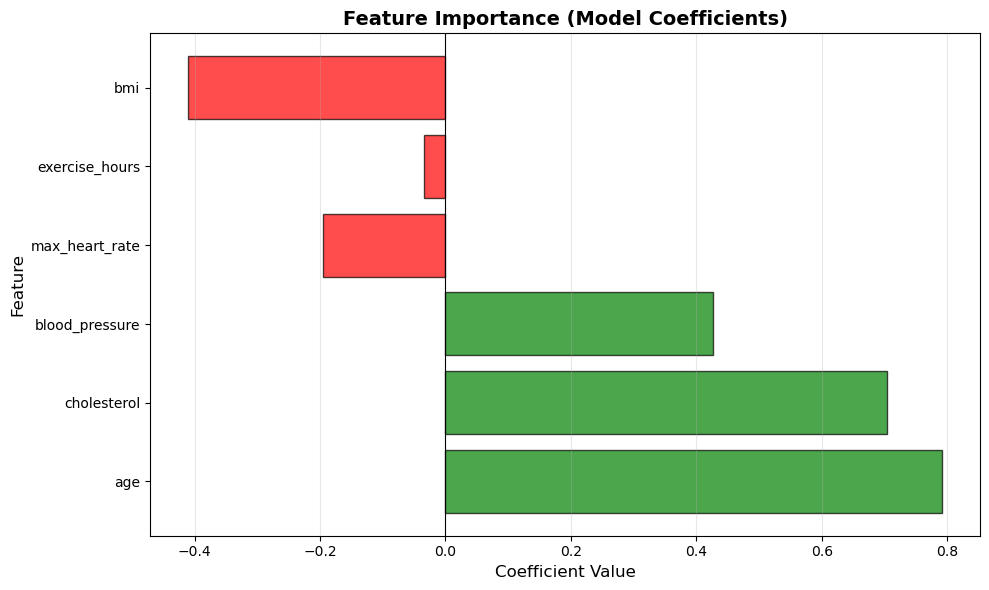


Coefficient interpretation:
- Positive coefficients increase the probability of heart disease
- Negative coefficients decrease the probability of heart disease
- Larger absolute values indicate stronger influence


In [80]:
# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'green' for c in coefficients]
plt.barh(feature_names, coefficients, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance (Model Coefficients)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nCoefficient interpretation:")
print("- Positive coefficients increase the probability of heart disease")
print("- Negative coefficients decrease the probability of heart disease")
print("- Larger absolute values indicate stronger influence")

## Part 4: Feature Selection Using Validation Set

Not all features may be useful. Let's use the validation set to determine which features to include.

### 4.1 Forward Selection

**YOUR CODE HERE**: Implement forward feature selection:
1. Start with no features
2. Try adding each remaining feature one at a time
3. Keep the feature that gives the best validation accuracy
4. Repeat until adding features no longer improves validation accuracy

Track the validation accuracy as you add features and store the selected features.

In [81]:
import pandas as pd

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_train.columns)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

selected_features = []
remaining_features = list(X_train.columns)
accuracy_history = []
best_accuracy = 0

print("="*60)
print("FORWARD FEATURE SELECTION")
print("="*60)

while len(remaining_features) > 0:
    feature_to_add = None
    best_acc_this_round = best_accuracy
    
    # Try each remaining feature
    for feature in remaining_features:
        trial_features = selected_features + [feature]
        
        # Train and evaluate
        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_scaled[trial_features], y_train)
        
        y_pred = model.predict(X_val_scaled[trial_features])
        acc = accuracy_score(y_val, y_pred)
        
        # Track best feature for this round
        if acc > best_acc_this_round:
            best_acc_this_round = acc
            feature_to_add = feature
    
    # STOP if no feature improves accuracy
    if feature_to_add is None:
        print(f"\n Stopping: No remaining feature improves validation accuracy")
        print(f"   Current best accuracy: {best_accuracy:.4f}")
        break
    
    # Add the best feature
    selected_features.append(feature_to_add)
    remaining_features.remove(feature_to_add)
    accuracy_history.append(best_acc_this_round)
    best_accuracy = best_acc_this_round
    
    print(f"✓ Added '{feature_to_add}' | Validation Accuracy: {best_accuracy:.4f}")

print("\n" + "="*60)
print(f"FINAL RESULT")
print("="*60)
print(f"Selected features ({len(selected_features)}): {selected_features}")
print(f"Best validation accuracy: {best_accuracy:.4f}")
print("="*60)


FORWARD FEATURE SELECTION
✓ Added 'blood_pressure' | Validation Accuracy: 0.7300

 Stopping: No remaining feature improves validation accuracy
   Current best accuracy: 0.7300

FINAL RESULT
Selected features (1): ['blood_pressure']
Best validation accuracy: 0.7300


Analysis of the Results:

Iteration 1 (Single Features):
- blood_pressure: 0.73 ← Best single feature
- age: 0.71
- holesterol: 0.69
- bmi: 0.69
  
Iteration 2 (Adding to blood_pressure):
- blood_pressure + exercise_hours: 0.73 (no improvement)
- blood_pressure + max_heart_rate: 0.72 (worse!)
- blood_pressure + bmi: 0.70 (worse!)
- blood_pressure + age: 0.69 (worse!)
  
Conclusion: 
- Adding ANY second feature either doesn't help or makes things worse. So stopping at just blood_pressure is correct!

**YOUR CODE HERE**: Create a plot showing how validation accuracy changes as you add features.

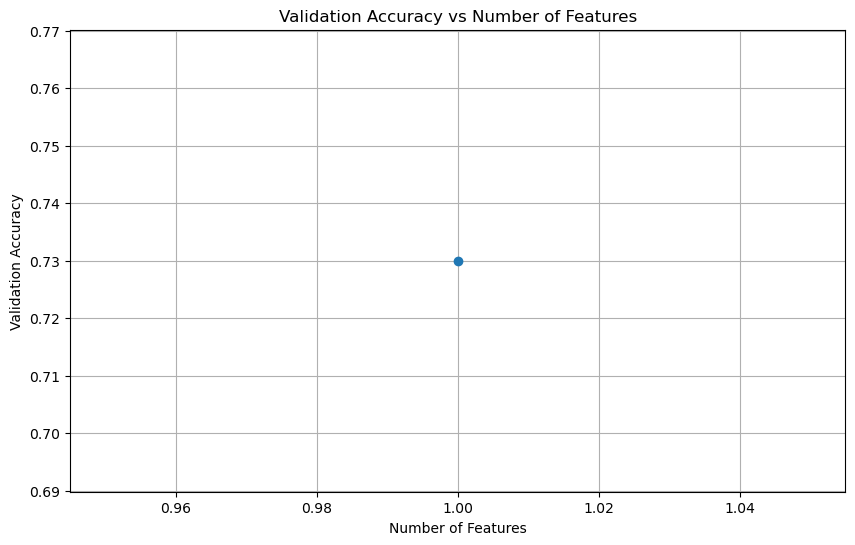

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, marker='o', linewidth=2)
plt.xlabel('Number of Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Number of Features')
plt.grid(True)
plt.show()


From what the graph shows:
- Accuracy stays flat for the first few features
- Then jumps once
- Then stays flat again
This pattern tells us something very specific about data and modified algorithm.

1. Only one feature actually improves accuracy
   * Flat accuracy → no improvement from adding features
2. One feature later causes a small improvement
   * At feature 4, accuracy jumps from ~0.73 to ~0.74.
3. Even if a feature is useless, it still gets added
   * Accuracy stays the same
   * The plot shows a horizontal line

### 4.2 Train Final Model with Selected Features

**YOUR CODE HERE**: Train a model using only the selected features, combine both X_train and X_val in final model

(train → validation → test)
Most labs use a 3‑way split:
1. Training set → used to fit the model
2. Validation set → used for feature selection
3. Test set → used ONLY at the very end to evaluate the final model

#### 1. Split the data

In [84]:
from sklearn.model_selection import train_test_split

# First split: train vs temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Second split: temp → val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (350, 6)
Validation: (75, 6)
Test: (75, 6)


#### 2. Scale AFTER splitting

In [87]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

#### 3. Now create X_final and y_final
Now they will have matching lengths.

In [88]:
X_final = pd.concat([
    X_train_scaled[selected_features],
    X_val_scaled[selected_features]
])

y_final = pd.concat([y_train, y_val])


#### 4. Train final model

In [92]:
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_final, y_final)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Evaluate on test set

In [91]:
y_test_pred = final_model.predict(X_test_scaled[selected_features])
test_acc = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_acc)


Test accuracy: 0.64


## Part 5: Regularisation

Regularisation helps prevent overfitting by penalizing large coefficients. Logistic regression in scikit-learn uses the `C` parameter, where smaller values mean stronger regularisation.

Your lecturer will talk about this in a lecture

### 5.1 Understanding the C Parameter

The parameter `C` is the inverse of regularization strength:
- **Large C** (e.g., 100): Weak regularization → Model can fit training data closely (risk of overfitting)
- **Small C** (e.g., 0.01): Strong regularization → Simpler model (risk of underfitting)

### 5.2 Selecting the Best C Value

**YOUR CODE HERE**: 
1. Try different values of C: [0.001, 0.01, 0.1, 1, 10, 100]
2. For each C value, train a model and evaluate on the validation set
3. Track both training and validation accuracy
4. Select the C value that gives the best validation accuracy

In [ ]:
LogisticRegression?

In [ ]:
# YOUR CODE HERE
# Test different C values
# C_values = [0.001, 0.01, 0.1, 1, 10, 100]
# train_accuracies = []
# val_accuracies = []

# for C in C_values:
#     # Train model with this C value
#     # Calculate train and validation accuracy
#     # Store results



**YOUR CODE HERE**: Create a plot showing training and validation accuracy for different C values. This plot should help you identify overfitting or underfitting.

In [ ]:
# YOUR CODE HERE
# Plot training and validation accuracy vs C
# Use a log scale for the x-axis (plt.xscale('log'))



**YOUR CODE HERE**: Train a final model with the best C value and evaluate it on the test set.

In [ ]:
# YOUR CODE HERE
# Train final model with best C
# Evaluate on test set



### 5.3 Visualizing the Effect of Regularisation

**YOUR CODE HERE**: Create a plot showing how the magnitude of coefficients changes with different C values. This visualizes how regularisation affects the model.

In [ ]:
# YOUR CODE HERE
# For each C value, get the coefficients and plot them
# Create a plot with C on x-axis (log scale) and coefficient values on y-axis
# Use different colors/lines for each feature



## Part 6: Multi-class Classification - Wine Quality Prediction

Now let's extend to a multi-class problem. Logistic regression can handle this using a "one-vs-rest" approach.

### 6.1 Load and Explore the Data

In [ ]:
# Load the wine quality dataset
wine_df = pd.read_csv('wine_quality.csv')

print("Dataset shape:", wine_df.shape)
print("\nFirst few rows:")
print(wine_df.head())
print("\nClass distribution:")
print(wine_df['quality'].value_counts().sort_index())

**YOUR CODE HERE**: Create visualizations to explore the wine dataset. Consider creating:
- Distribution of features for each quality class
- Correlation between features
- Any other exploratory plots you think would be useful

In [ ]:
# YOUR CODE HERE
# Explore the wine dataset visually



### 6.2 Prepare the Data

**YOUR CODE HERE**: 
1. Separate features and target
2. Split into train/validation/test sets (60/20/20) (train_test_split can be used twice)
3. Scale the features

In [ ]:
# YOUR CODE HERE
# Prepare the wine dataset



### 6.3 Train Multi-class Logistic Regression

**YOUR CODE HERE**: Train a multi-class logistic regression model. Note that scikit-learn handles multi-class automatically!

In [ ]:
# YOUR CODE HERE
# Train multi-class logistic regression
# Use multi_class='ovr' (one-vs-rest) or 'multinomial'



### 6.4 Evaluate the Multi-class Model

**YOUR CODE HERE**: 
1. Make predictions on the validation set
2. Calculate accuracy

In [ ]:
# YOUR CODE HERE
# Evaluate the multi-class model



### 6.5 Visualize the Confusion Matrix

For multi-class problems, a confusion matrix is especially helpful.

In [ ]:
# Create a nice visualization of the confusion matrix
cm = confusion_matrix(y_wine_val, y_wine_val_pred)
classes = ['Low', 'Medium', 'High']

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Wine Quality', fontsize=14, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, fontsize=11)
plt.yticks(tick_marks, classes, fontsize=11)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=14, fontweight='bold')

plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.tight_layout()
plt.show()

### 6.6 Regularization for Multi-class

**YOUR CODE HERE**: Similar to the binary case, find the best C value for the multi-class problem:
1. Test different C values
2. Track validation accuracy
3. Plot the results
4. Select the best C, retrain with both training and validation sets, then evaluate on the test set

In [ ]:
# YOUR CODE HERE
# Find best C for multi-class problem



In [ ]:
# YOUR CODE HERE
# Create a comparison of your final models



## Reflection Questions

Answer these questions based on your experiments:

1. **Feature Selection**: Did using fewer features improve or hurt performance? Why might this be?

2. **Regularization**: What happened to model performance as you changed the C parameter? At what point did you see overfitting or underfitting?

3. **Multi-class vs Binary**: Was the multi-class problem harder than the binary problem? What metrics helped you understand this?

4. **Feature Importance**: Which features were most important for each problem? Did this match your intuition from the data exploration?

5. **Validation Set**: Why is it important to use a separate validation set for model selection? What would happen if you used the test set instead?

Write your answers here:

**Your Reflections:**

1. 

2. 

3. 

4. 

5. 